# Mean-driven vs. fluctuation-driven

In [1]:
from brian2 import *
%xmode minimal
prefs.codegen.target = 'numpy'  # ignore...
import plot_utils

Exception reporting mode: Minimal


In [2]:
start_scope()

# Neuron
Cm = 1*nF
E_L = -70*mV
g_L = 30*nS
tau_syn = 5*ms
I_const = 0.5*nA
neuron = NeuronGroup(1, '''dv/dt = (g_L*(E_L - v) + I_const)/Cm : volt''',
                     threshold='v>-50*mV', reset='v=E_L',
                     method='exact')
neuron.v = E_L

# Record spikes, current and membrane potential of neuron
state_mon = StateMonitor(neuron, 'v', record=0)
out_spikes = SpikeMonitor(neuron)
run(1000*ms)

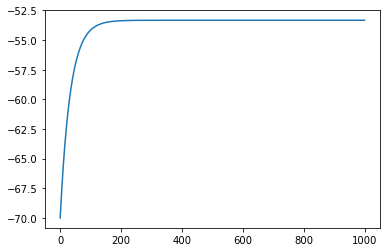

In [3]:
plt.plot(state_mon.t/ms, state_mon.v[0]/mV)

The constant current is not strong enough to drive the neuron to its threshold.

In [4]:
start_scope()

# Inputs
input_spikes = PoissonGroup(10000, rates=2*Hz)

# Neuron
Cm = 1*nF
E_L = -70*mV
g_L = 30*nS
tau_syn = 5*ms
neuron = NeuronGroup(1, '''dv/dt = (g_L*(E_L - v) + I_syn)/Cm : volt
                           dI_syn/dt = -I_syn/tau_syn  : amp''',
                     threshold='v>-50*mV', reset='v=E_L',
                     method='exact')
neuron.v = E_L

# connect input to the neurons
w = 0.01*nA
synapses = Synapses(input_spikes, neuron, on_pre='I_syn += w')
synapses.connect()

# Record spikes, current and membrane potential of neuron
inp_spikes = SpikeMonitor(input_spikes)
state_mon = StateMonitor(neuron, ['v', 'I_syn'], record=0)
out_spikes = SpikeMonitor(neuron)
run(1000*ms)

<AxesSubplot:xlabel='time (ms)', ylabel='$v$ (mV)'>

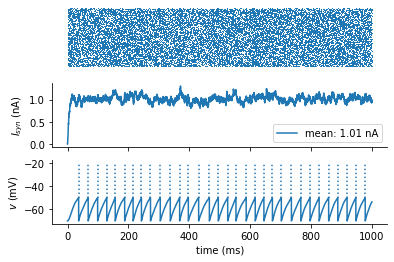

In [5]:
plot_utils.plot_current_voltage(state_mon, inp_spikes, out_spikes)

A super-threshold current leads to regularl firing (*mean-driven regime*)

In [6]:
start_scope()

# Inputs
input_spikes = PoissonGroup(10000, rates=2*Hz)
exc_spikes = input_spikes[0:8000]
inh_spikes = input_spikes[8000:10000]
# Neuron
Cm = 1*nF
E_L = -70*mV
g_L = 30*nS
tau_syn = 5*ms
neuron = NeuronGroup(1, '''dv/dt = (g_L*(E_L - v) + I_syn)/Cm : volt
                           dI_syn/dt = -I_syn/tau_syn  : amp''',
                     threshold='v>-50*mV', reset='v=E_L',
                     method='exact')
neuron.v = E_L

# connect input to the neurons
w = 0.05*nA
exc_synapses = Synapses(exc_spikes, neuron, on_pre='I_syn += w')
exc_synapses.connect()
inh_synapses = Synapses(inh_spikes, neuron, on_pre='I_syn -= 3.5*w')
inh_synapses.connect()

# Record spikes, current and membrane potential of neuron
inp_spikes = SpikeMonitor(input_spikes)
state_mon = StateMonitor(neuron, ['v', 'I_syn'], record=0)
out_spikes = SpikeMonitor(neuron)
run(1000*ms)

<AxesSubplot:xlabel='time (ms)', ylabel='$v$ (mV)'>

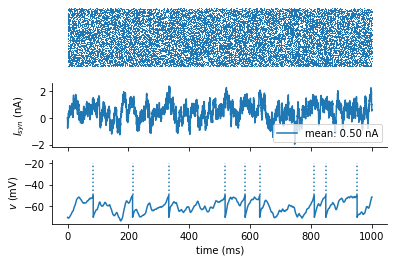

In [7]:
plot_utils.plot_current_voltage(state_mon, inp_spikes, out_spikes)

A subthreshold current with strong fluctuations leads to irregular firing (*fluctuation-driven regime*)